In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from imblearn.over_sampling import SMOTE



In [25]:
#------------------------
# 1. DATA PREPROCESSING
# -------------------------

# Remap the 'Region' labels to two classes:
#   - 'organic extra virgin olive oil' for Calabria, Sicily
#   - 'extra virgin olive oil' for all other specified regions
#

olive_data = pd.read_csv("olive.csv")

olive_data.loc[olive_data['Region'] == 'North-Apulia', 'Region'] = 'extra virgin olive oil'
olive_data.loc[olive_data['Region'] == 'South-Apulia', 'Region'] = 'extra virgin olive oil'
olive_data.loc[olive_data['Region'] == 'Calabria', 'Region'] = 'organic extra virgin olive oil'
olive_data.loc[olive_data['Region'] == 'Sicily', 'Region'] = 'organic extra virgin olive oil'
olive_data.loc[olive_data['Region'] == 'Inland-Sardinia', 'Region'] = 'extra virgin olive oil'
olive_data.loc[olive_data['Region'] == 'Coast-Sardinia', 'Region'] = 'extra virgin olive oil'
olive_data.loc[olive_data['Region'] == 'Umbria', 'Region'] = 'extra virgin olive oil'
olive_data.loc[olive_data['Region'] == 'East-Liguria', 'Region'] = 'extra virgin olive oil'
olive_data.loc[olive_data['Region'] == 'West-Liguria', 'Region'] = 'extra virgin olive oil'

print("Total samples:", len(olive_data))
print("Unique classes in 'Region':", olive_data['Region'].unique())

# Drop irrelevant columns
olive_data = olive_data.drop(['id', 'other', 'Area'], axis=1)


# Describe
print(olive_data.describe(()))


Total samples: 572
Unique classes in 'Region': ['extra virgin olive oil' 'organic extra virgin olive oil']
         palmitic  palmitoleic     stearic       oleic     linoleic  \
count  572.000000   572.000000  572.000000  572.000000   572.000000   
mean     4.599650  1231.741259  126.094406  228.865385  7311.748252   
std      2.356687   168.592264   52.494365   36.744935   405.810222   
min      1.000000   610.000000   15.000000  152.000000  6300.000000   
50%      3.000000  1201.000000  110.000000  223.000000  7302.500000   
max      9.000000  1753.000000  280.000000  375.000000  8410.000000   

         linolenic   arachidic  eicosenoic  
count   572.000000  572.000000  572.000000  
mean    980.527972   31.888112   58.097902  
std     242.799221   12.968697   22.030250  
min     448.000000    0.000000    0.000000  
50%    1030.000000   33.000000   61.000000  
max    1470.000000   74.000000  105.000000  


In [27]:

# -------------------------
# 2. DATA SPLITTING
# -------------------------
# Define features (X) and target (y)
X = olive_data.drop('Region', axis=1)
y = olive_data['Region']

# Split into training (80%) and testing (20%) sets, using stratification to preserve class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X)




     palmitic  palmitoleic  stearic  oleic  linoleic  linolenic  arachidic  \
0           1         1075       75    226      7823        672         36   
1           1         1088       73    224      7709        781         31   
2           1          911       54    246      8113        549         31   
3           1          966       57    240      7952        619         50   
4           1         1051       67    259      7771        672         50   
..        ...          ...      ...    ...       ...        ...        ...   
567         8         1280      110    290      7490        790         10   
568         8         1060      100    270      7740        810         10   
569         8         1010       90    210      7720        970          0   
570         8          990      120    250      7750        870         10   
571         8          960       80    240      7950        740         10   

     eicosenoic  
0            60  
1            61  
2        

In [32]:

# -------------------------
# 3. APPLY SMOTE TO THE TRAINING SET
# -------------------------
# Use SMOTE and apply it to the training data only.
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


/var/folders/g9/8p_qmzf15dj1chjxryshlpp40000gn/T/ipykernel_23808/4174368729.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="viridis")
/var/folders/g9/8p_qmzf15dj1chjxryshlpp40000gn/T/ipykernel_23808/4174368729.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_sm, palette="viridis")


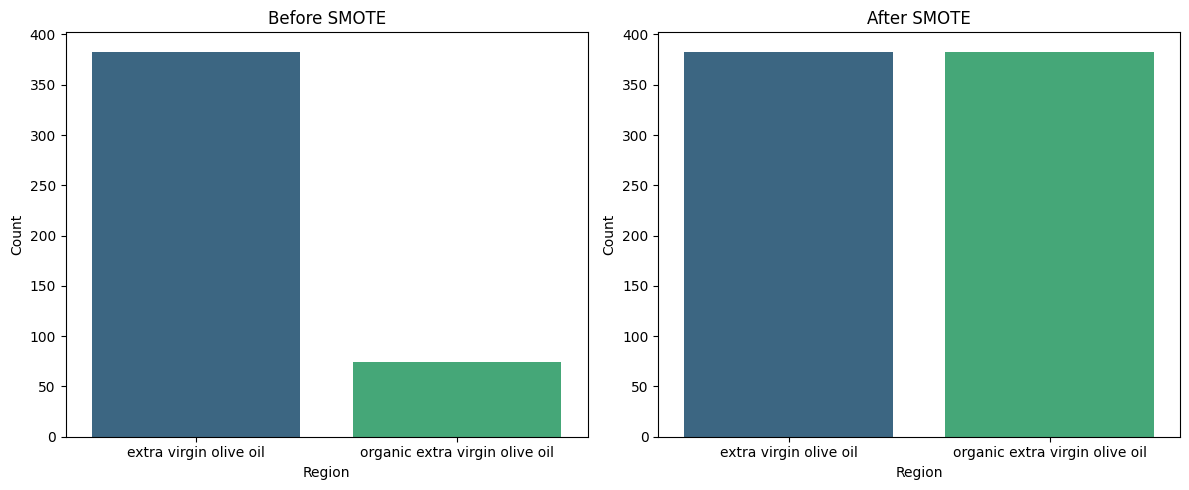

In [33]:

# -------------------------
# 4. VISUALIZE CLASS DISTRIBUTION BEFORE AND AFTER SMOTE
# -------------------------
plt.figure(figsize=(12, 5))

# Plot the original training set distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette="viridis")
plt.title("Before SMOTE")
plt.xlabel("Region")
plt.ylabel("Count")

# Plot the distribution after applying SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_sm, palette="viridis")
plt.title("After SMOTE")
plt.xlabel("Region")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [34]:

# -------------------------
# 5. MODEL TRAINING
# -------------------------

# 5.1 Decision Tree Classifier (does not require feature scaling)
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_sm, y_train_sm)
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("\n--- Decision Tree ---")
print("Accuracy:", dt_acc)
print(classification_report(y_test, dt_pred))

# 5.2 Random Forest Classifier (does not require feature scaling)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_sm, y_train_sm)
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("\n--- Random Forest ---")
print("Accuracy:", rf_acc)
print(classification_report(y_test, rf_pred))

# 5.3 Support Vector Classifier (SVC) with feature scaling using a pipeline
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, random_state=42))
])
svc_pipeline.fit(X_train_sm, y_train_sm)
svc_pred = svc_pipeline.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)
print("\n--- SVC ---")
print("Accuracy:", svc_acc)
print(classification_report(y_test, svc_pred))



--- Decision Tree ---
Accuracy: 0.9652173913043478
                                precision    recall  f1-score   support

        extra virgin olive oil       0.98      0.98      0.98        97
organic extra virgin olive oil       0.89      0.89      0.89        18

                      accuracy                           0.97       115
                     macro avg       0.93      0.93      0.93       115
                  weighted avg       0.97      0.97      0.97       115


--- Random Forest ---
Accuracy: 0.9739130434782609
                                precision    recall  f1-score   support

        extra virgin olive oil       0.97      1.00      0.98        97
organic extra virgin olive oil       1.00      0.83      0.91        18

                      accuracy                           0.97       115
                     macro avg       0.98      0.92      0.95       115
                  weighted avg       0.97      0.97      0.97       115


--- SVC ---
Accuracy: 0.9

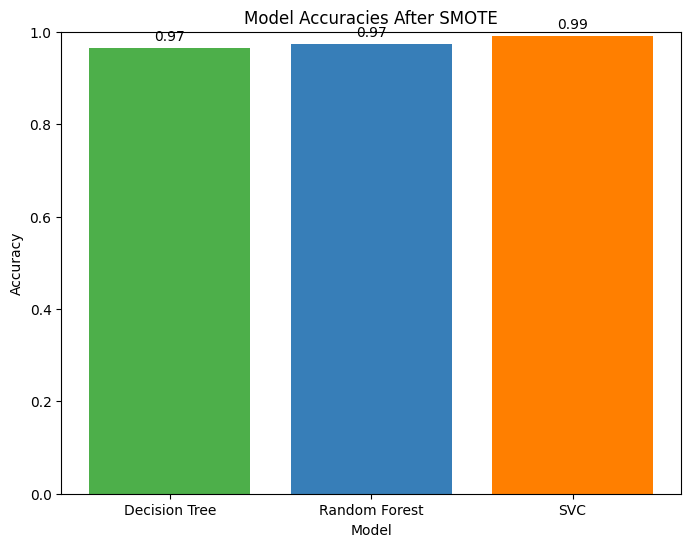

In [ ]:

# -------------------------
# 6. VISUALIZATION OF MODEL PERFORMANCE
# -------------------------
# Prepare a bar plot comparing the accuracies of the three models
model_results = {
    'Decision Tree': dt_acc,
    'Random Forest': rf_acc,
    'SVC': svc_acc
}

plt.figure(figsize=(8, 6))
models = list(model_results.keys())
accuracies = [model_results[model] for model in models]
bar_colors = ['#4daf4a', '#377eb8', '#ff7f00']

bars = plt.bar(models, accuracies, color=bar_colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies After SMOTE')
plt.ylim(0, 1)

# Annotate bars with accuracy values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.show()




[[95  2]
 [ 2 16]]


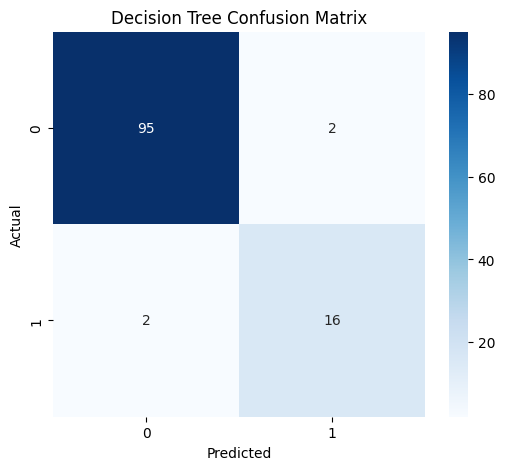

In [35]:
# plot confusion matrices for each model.
plt.figure(figsize=(6, 5))
cm_dt = confusion_matrix(y_test, dt_pred)

print(cm_dt)

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()